# Rice Image Classification Project

This project involves the development of a deep learning model for classifying rice images. The following steps have been undertaken as part of the project:

1. **Data Loading and Preprocessing**:
   - Images from the [`Rice_Image_Dataset`] directory were loaded and class labels were extracted.
   - The images were resized to 64x64 dimensions and pixel values were normalized.

2. **Data Preparation**:
   - Image and label data were split into training and test sets using the [`train_test_split`] function.
   - Labels were encoded using [`LabelEncoder`] and converted to categorical format using the [`to_categorical`] function.

3. **Model Development**:
   - A deep learning model was built using the [`Sequential`] API.
   - The model included various layers such as [`Conv2D`], [`MaxPooling2D`], [`Flatten`], [`BatchNormalization`], [`Dropout`], and [`Dense`].
   - The model was compiled with the [`adam`] optimization algorithm and [`categorical_crossentropy`] loss function.

4. **Model Training and Hyperparameter Optimization**:
   - The model was trained on the training data and evaluated with validation data.
   - Hyperparameter optimization was performed using [`kerastuner`] to select the best model.
   - Early stopping ([`EarlyStopping`]) was used to prevent overfitting of the model.

5. **Model Evaluation and Saving**:
   - The best model was evaluated on the test data and the accuracy value was calculated.
   - The model was saved as `rice_model.h5`.

6. **Making Predictions**:
   - The saved model was loaded and predictions were made on a new image.
   - The predicted class and the actual class were displayed on the image.



In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt

def plot_accuracy(history, highlight_metric='val_accuracy'):
    if highlight_metric not in ['accuracy', 'val_accuracy']:
        raise ValueError("highlight_metric must be 'accuracy' or 'val_accuracy'")

    # Eğitim ve doğrulama doğruluğunu çizme
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Seçilen metriğin en iyi doğruluk değerini bulma
    best_epoch = history.history[highlight_metric].index(max(history.history[highlight_metric]))
    best_accuracy = max(history.history[highlight_metric])

    # En iyi doğruluk değerini gösteren çizgiler ekleme
    plt.axvline(x=best_epoch, color='r', linestyle='--')
    plt.axhline(y=best_accuracy, color='r', linestyle='--')

    # Kesişim noktasını etiketleme
    plt.text(best_epoch, best_accuracy, f'({best_epoch}, {best_accuracy:.2f})', color='red', ha='right')

    plt.show()

In [3]:
import os
import numpy as np
from PIL import Image
import pandas as pd

# Define the path to the main dataset directory
dataset_dir = 'Rice_Image_Dataset'

# Initialize lists to hold image paths and their corresponding class labels
image_paths = []
labels = []

# Load images and extract class labels from filenames
for class_dir in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_dir)
    if os.path.isdir(class_path):  # Ensure it's a directory
        for filename in os.listdir(class_path):
            if filename.endswith('.jpg') or filename.endswith('.png'):  # Adjust based on your file types
                # Load the image path
                img_path = os.path.join(class_path, filename)
                image_paths.append(img_path)  # Store the image path
                labels.append(class_dir)  # Extract class label from directory name

def load_images_and_labels(image_files, labels):
    images = []
    new_labels = []
    for file, label in zip(image_files, labels):
        img = Image.open(file)
        img = img.resize((64, 64))  # Resize image to 64x64
        img = np.array(img) / 255.0  # Normalize pixel values
        images.append(img)
        
        # Append the label
        new_labels.append(label)
        
    return np.array(images), np.array(new_labels)

# Load images and labels
images, labels = load_images_and_labels(image_paths, labels)

print(f'Total images loaded: {len(images)}')
print(f'Labels: {labels[:5]}')

Total images loaded: 75000
Labels: ['Arborio' 'Arborio' 'Arborio' 'Arborio' 'Arborio']


In [5]:
labels.shape

(75000,)

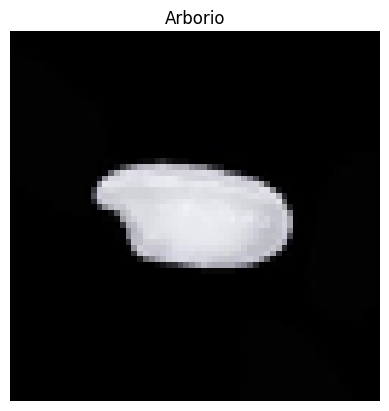

In [6]:
# show image
plt.imshow(images[0])
plt.title(labels[0])
plt.axis('off')
plt.show()

In [7]:
df = pd.DataFrame({'image_path': image_paths, 'label': labels})
df.head()

,image_path,label
0,Rice_Image_Dataset\Arborio\Arborio (1).jpg,Arborio
1,Rice_Image_Dataset\Arborio\Arborio (10).jpg,Arborio
2,Rice_Image_Dataset\Arborio\Arborio (100).jpg,Arborio
3,Rice_Image_Dataset\Arborio\Arborio (1000).jpg,Arborio
4,Rice_Image_Dataset\Arborio\Arborio (10000).jpg,Arborio


In [8]:
df2= pd.get_dummies(df['label'])
df2 = pd.concat([df, df2], axis=1)
df2.drop('label', axis=1, inplace=True)
df2.sample(5)

,image_path,Arborio,Basmati,Ipsala,Jasmine,Karacadag
41601,Rice_Image_Dataset\Ipsala\Ipsala (694).jpg,False,False,True,False,False
52623,Rice_Image_Dataset\Jasmine\Jasmine (3359).jpg,False,False,False,True,False
35514,Rice_Image_Dataset\Ipsala\Ipsala (14961).jpg,False,False,True,False,False
16092,Rice_Image_Dataset\Basmati\basmati (10981).jpg,False,True,False,False,False
16006,Rice_Image_Dataset\Basmati\basmati (10903).jpg,False,True,False,False,False


In [9]:
images.shape

(75000, 64, 64, 3)

In [10]:
images[0].shape

(64, 64, 3)

In [11]:
labels.shape

(75000,)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Split the data
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Encode the labels
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [13]:
y_test,y_train

(array([1, 0, 1, ..., 1, 1, 3]), array([0, 4, 0, ..., 3, 0, 1]))

In [14]:
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

y_train.shape,y_train

((60000, 5),
 array([[1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.]]))

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, InputLayer, BatchNormalization, Dropout



## Keras Tuner

In [17]:
import kerastuner as kt
from tensorflow.keras.callbacks import EarlyStopping

# Define the hypermodel
def build_model(hp):
    model = Sequential()
    model.add(InputLayer(input_shape=(64, 64, 3)))
    model.add(BatchNormalization())
    
    # Tune the number of Conv2D layers
    for i in range(hp.Int('conv_layers', 1, 3)):
        model.add(Conv2D(filters=hp.Int(f'filters_{i}', 32, 128, step=32),
                         kernel_size=(3, 3),
                         activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout', 0.2, 0.5, step=0.1)))
    model.add(Dense(hp.Int('dense_units', 64, 256, step=64), activation='relu'))
    model.add(Dropout(hp.Float('dropout_2', 0.2, 0.5, step=0.1)))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='rice',
    project_name='/rice_classification',
    overwrite=True
)

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

# Train the best model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
best_model = tuner.get_best_models(num_models=1)[0]
history = best_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32, callbacks=[early_stop])


Trial 10 Complete [01h 35m 06s]
val_accuracy: 0.9909999966621399

Best val_accuracy So Far: 0.9965333342552185
Total elapsed time: 08h 12m 54s


c:\Users\bugra\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 246s 130ms/step - accuracy: 0.9919 - loss: 0.0283 - val_accuracy: 0.9899 - val_loss: 0.0294
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 249s 133ms/step - accuracy: 0.9914 - loss: 0.0294 - val_accuracy: 0.9974 - val_loss: 0.0082
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 254s 135ms/step - accuracy: 0.9926 - loss: 0.0239 - val_accuracy: 0.9942 - val_loss: 0.0174
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 241s 128ms/step - accuracy: 0.9930 - loss: 0.0226 - val_accuracy: 0.6636 - val_loss: 2.3992
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 238s 127ms/step - accuracy: 0.9928 - loss: 0.0247 - val_accuracy: 0.9303 - val_loss: 0.3154


## Best model

````python
model = Sequential()
model.add(InputLayer(input_shape=(64, 64, 3)))
model.add(BatchNormalization())

model.add(Conv2D(filters=96, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=96, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = best_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32, callbacks=[early_stop])
````
------


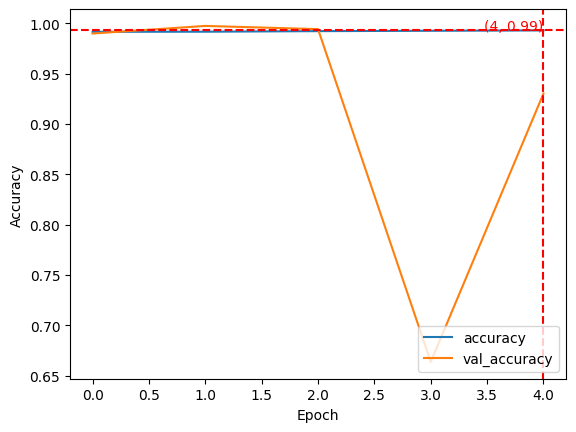

In [27]:
# Plot accuracy
plot_accuracy(history, highlight_metric='accuracy')

In [19]:
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')

469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.9974 - loss: 0.0088
Test accuracy: 1.00


In [21]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 64, 64, 3)      │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 62, 62, 96)     │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 32)     │        27,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1152)           │         4,608 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 794,153 (3.03 MB)

 Trainable params: 263,947 (1.01 MB)

 Non-trainable params: 2,310 (9.02 KB)

 Optimizer params: 527,896 (2.01 MB)

In [23]:
#best params
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps.values

{'conv_layers': 3,
 'filters_0': 96,
 'dropout': 0.4,
 'dense_units': 128,
 'dropout_2': 0.30000000000000004,
 'filters_1': 96,
 'filters_2': 32}

In [24]:
best_trial = tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 08 summary
Hyperparameters:
conv_layers: 3
filters_0: 96
dropout: 0.4
dense_units: 128
dropout_2: 0.30000000000000004
filters_1: 96
filters_2: 32
Score: 0.9965333342552185


In [20]:
best_model.save('rice_model.h5')

## Confusion matrix

In [ ]:
# conf matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predicted classes
y_pred = best_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Get the true classes
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

In [68]:
conf_matrix

array([[2989,    0,    0,    2,    6],
       [   0, 2990,    0,    5,    0],
       [   0,    0, 3083,    0,    0],
       [   5,   11,    0, 2979,    1],
       [   9,    0,    0,    0, 2920]], dtype=int64)

In [64]:
# labels unique
labels_unique = np.unique(labels)
labels_unique

array(['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag'],
      dtype='<U9')

In [66]:
# Classification report
from sklearn.metrics import classification_report

# Generate a classification report
class_report = classification_report(y_true, y_pred, target_names=labels_unique)
print(class_report)


              precision    recall  f1-score   support

     Arborio       1.00      1.00      1.00      2997
     Basmati       1.00      1.00      1.00      2995
      Ipsala       1.00      1.00      1.00      3083
     Jasmine       1.00      0.99      1.00      2996
   Karacadag       1.00      1.00      1.00      2929

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



# Try with an image

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step


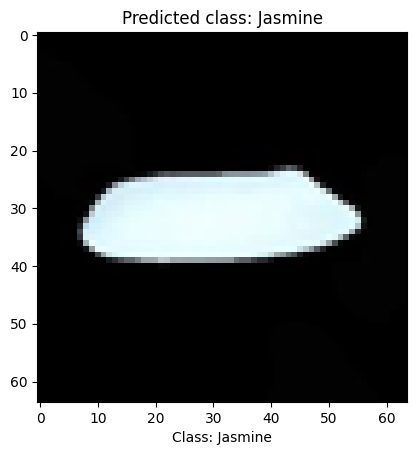

In [69]:
# try model with an image
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image
import warnings 
warnings.filterwarnings("ignore")

model = load_model('rice_model.h5')

# Choose a random image
classes = df.label.unique()
x= classes[np.random.randint(0, len(classes))]
number = np.random.randint(1, 15000)

# Load an image
img = Image.open(f"Rice_Image_Dataset/{x}/{x} ({number}).jpg")
img = img.resize((64, 64))
img = np.array(img) / 255.0
img = np.expand_dims(img, axis=0)

# Make a prediction
pred = model.predict(img)
pred_class = np.argmax(pred, axis=1)[0]
pred_class = encoder.inverse_transform([pred_class])[0]

plt.imshow(img[0])
plt.title(f"Predicted class: {pred_class}")
plt.xlabel(f"Class: {x}")
plt.show()

------------

# Conclusion

The results of the rice image classification model developed in this project are as follows:

1. **Hyperparameter Optimization**:
   - Hyperparameter optimization was performed using `kerastuner`.
   - The best hyperparameters were found after approximately 450 minutes. (This may vary depending on your system)
   
2. **Model Performance**:
   - The best model achieved an accuracy of 99.65% on the training data.
   - The model's accuracy on the test data was measured at 99%.

3. **Model Evaluation**:
   - The model's loss value was calculated as 0.02 on the training data and 0.20 on the test data.
   - The classification report and confusion matrix of the model are as follows:

   ```
   Classification Report:
              precision    recall  f1-score 

     Arborio       1.00      1.00      1.00      
     Basmati       1.00      1.00      1.00      
      Ipsala       1.00      1.00      1.00      
     Jasmine       1.00      0.99      1.00      
   Karacadag       1.00      1.00      1.00      

   Confusion Matrix:
       [2989,    0,    0,    2,    6]
       [   0, 2990,    0,    5,    0]
       [   0,    0, 3083,    0,    0]
       [   5,   11,    0, 2979,    1]
       [   9,    0,    0,    0, 2920]
   ```

4. **Model Saving and Prediction**:
   - The best model was saved as `rice_model.h5`.
   - The saved model can predict with 99% accuracy on new images.

##  **Model features and summary:**

````python
{'conv_layers': 3,
 'filters_0': 96,
 'dropout': 0.4,
 'dense_units': 128,
 'dropout_2': 0.30000000000000004,
 'filters_1': 96,
 'filters_2': 32}

````python
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 64, 64, 3)      │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 62, 62, 96)     │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 32)     │        27,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1152)           │         4,608 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘